## Setup Kaggle for downloading kaggle datasets

In [ ]:
from google.colab import files          # Helps for file actions in colab      

files.upload()                          # Upload kaggle.json file containing user credentials

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gowthamkumar1626","key":"2fca20f08f11cdf20cf98099fde3ecf3"}'}

In [ ]:
# Install kaggle 

!pip install -q kaggle

In [ ]:
# Create Kaggle directories and move the uploaded to kaggle directory and provide read and write permission to user on kaggle.josn file
# This setup is necessary to download kaggle datasets

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Copy the API of dataset from kaggle and run it here
# This will download the dataset and saves in a zip format

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:45<00:00, 61.6MB/s]
100% 2.70G/2.70G [00:45<00:00, 63.7MB/s]


**Note:** Extract the zip file to access the contents

In [ ]:
import zipfile                                                                  # Helps to unzip the contents

with zipfile.ZipFile("/content/new-plant-diseases-dataset.zip", 'r') as file:

    file.extractall("/content/")                                                # Extract the files into content directory

## Walk through the data

In [ ]:
# It is important to see how the dataset is structed, what classes are there etc.

import os


root_dir = "/content/New Plant Diseases Dataset(Augmented)"
base_dir = os.path.join(root_dir, "New Plant Diseases Dataset(Augmented)")

print(os.listdir(base_dir))

['train', 'valid']


**Note:** It contains two directories named `train` and `valid`

In [ ]:
# Let us go through those directories

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")

for each_dir in os.listdir(train_dir):
  print(each_dir)

Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Tomato___Leaf_Mold
Grape___Esca_(Black_Measles)
Soybean___healthy
Potato___Late_blight
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Septoria_leaf_spot
Pepper,_bell___Bacterial_spot
Corn_(maize)___Common_rust_
Apple___Black_rot
Apple___Cedar_apple_rust
Potato___healthy
Grape___healthy
Peach___healthy
Tomato___Early_blight
Apple___healthy
Tomato___Late_blight
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Corn_(maize)___Northern_Leaf_Blight
Tomato___Tomato_mosaic_virus
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Pepper,_bell___healthy
Tomato___Bacterial_spot
Corn_(maize)___healthy
Cherry_(including_sour)___healthy
Grape___Black_rot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Potato___Early_blight
Raspberry___healthy
Tomato___Target_Spot
Cherry_(including_sour)___Powdery_mildew
Apple___Apple_scab
Blueberry___healthy
Tomato___healthy
Strawberry___healthy


There are many directories inside train directory. Let get more details on it.

In [ ]:
# How many directories are there inside train directory


no_labels = len(os.listdir(train_dir))
print(f"Total no.of direcotires or labels inside train data: {no_labels}")

Total no.of direcotires or labels inside train data: 38


## Get numbers

1. How many images are there in train set?
2. How many images are there in valid set?

In [ ]:
import glob

print(f"No.of images in train set: {len(list(glob.glob(train_dir + '/*/*')))}")
print(f"No.of images in valdi set: {len(list(glob.glob(valid_dir + '/*/*')))}")

No.of images in train set: 70295
No.of images in valdi set: 17572


## Check whether the dataset is balanced or not

- Find no.of images under each directory.
- No.of images under each label are equal?

In [ ]:
# Pretty table for formatting outputs into a table format
from prettytable import PrettyTable                                           

# Table initializers
image_counts_table = PrettyTable(["label", "image count"])
total_image_counts_table = PrettyTable()
total_count = 0
count = 0

for label in os.listdir(train_dir):
  label_path = os.path.join(train_dir, label)
  
  count = len(list(glob.glob(label_path + '/*')))
  total_count += count
  image_counts_table.add_row([label, count])

total_image_counts_table.header = False
total_image_counts_table.min_table_width = 70
total_image_counts_table.add_row([f"Total labels: {no_labels}", f"Total image count: {total_count}"])

print(image_counts_table)
print(total_image_counts_table)

+----------------------------------------------------+-------------+
|                       label                        | image count |
+----------------------------------------------------+-------------+
|     Grape___Leaf_blight_(Isariopsis_Leaf_Spot)     |     1722    |
|              Squash___Powdery_mildew               |     1736    |
|              Strawberry___Leaf_scorch              |     1774    |
|                 Tomato___Leaf_Mold                 |     1882    |
|            Grape___Esca_(Black_Measles)            |     1920    |
|                 Soybean___healthy                  |     2022    |
|                Potato___Late_blight                |     1939    |
|   Tomato___Spider_mites Two-spotted_spider_mite    |     1741    |
|            Tomato___Septoria_leaf_spot             |     1745    |
|           Pepper,_bell___Bacterial_spot            |     1913    |
|            Corn_(maize)___Common_rust_             |     1907    |
|                 Apple___Black_ro

**Note:** It is imbalanced data

## Know more about the labels

It is a **multi class** dataset. 38 classes are there in dataset. Get know more about each label.

This dataset contains several crop leafs.
- Healthy leafs are labelled with **healthy** along with **crop name**. 🍀
- Labels that are not conining **healthy** in their label are **diseased** leaves. 🐞

In [ ]:
# Count no.of healthy labels are there

count = 0

for each_label in os.listdir(train_dir):
  if "healthy" in each_label:
    count += 1
    print(each_label)

print()
print(f"Total no.of healthy labels: {count}")

Soybean___healthy
Potato___healthy
Grape___healthy
Peach___healthy
Apple___healthy
Pepper,_bell___healthy
Corn_(maize)___healthy
Cherry_(including_sour)___healthy
Raspberry___healthy
Blueberry___healthy
Tomato___healthy
Strawberry___healthy

Total no.of healthy labels: 12


In [ ]:
# Count no.of diseased labels

count = 0

for each_label in os.listdir(train_dir):
  if "healthy" not in each_label:
    count += 1
    print(each_label)

print()
print(f"Total no.of diseased labels: {count}")

Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Tomato___Leaf_Mold
Grape___Esca_(Black_Measles)
Potato___Late_blight
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Septoria_leaf_spot
Pepper,_bell___Bacterial_spot
Corn_(maize)___Common_rust_
Apple___Black_rot
Apple___Cedar_apple_rust
Tomato___Early_blight
Tomato___Late_blight
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Corn_(maize)___Northern_Leaf_Blight
Tomato___Tomato_mosaic_virus
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Tomato___Bacterial_spot
Grape___Black_rot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Potato___Early_blight
Tomato___Target_Spot
Cherry_(including_sour)___Powdery_mildew
Apple___Apple_scab

Total no.of diseased labels: 26


**Note:** Find how many individual plants are there?

In [ ]:
import re

plant_names = []

for each_label in os.listdir(train_dir):
  name = re.split("_|,", each_label)[0]
  if name not in plant_names:
    plant_names.append(name)

print(f"Total no.of plants: {len(plant_names)}")

Total no.of plants: 14


Total unique plants are 14 but we have healthy data of 12 different plants only.
1. Let us find what is missing.

In [ ]:
healthy_plant_names = []

for each_label in os.listdir(train_dir):
  if "healthy" in each_label:
    name = re.split("_|,", each_label)[0]
    if name not in healthy_plant_names:
      healthy_plant_names.append(name)

print(f"Total no.of healthy labels: {len(healthy_plant_names)}")

Total no.of healthy labels: 12


In [ ]:
diseased_plant_names = []

for each_label in os.listdir(train_dir):
  if "healthy" not in each_label:
    name = re.split("_|,", each_label)[0]
    if name not in diseased_plant_names:
      diseased_plant_names.append(name)

print(f"Total no.of healthy labels: {len(diseased_plant_names)}")

Total no.of healthy labels: 11


In [ ]:
# Initialize both lists as sets to find the difference

plant_names_set = set(plant_names)
healthy_plant_names_set = set(healthy_plant_names)
diseased_plant_names_set = set(diseased_plant_names)

no_healthy_labels = list(plant_names_set - healthy_plant_names_set)

print(f"No.of plants not having healthy labels: {len(no_healthy_labels)}")
print(f"Those are: {no_healthy_labels}")

No.of plants not having healthy labels: 2
Those are: ['Orange', 'Squash']


**Note:** For quality analysis we should not include these two in our model predictions.

> Let us explore dataset by preparing models for each indiviual plant having both healthy and diseased

In [ ]:
# Let us find plants having both healthy and diseased leaves

selected_plants = sorted(list(set.intersection(healthy_plant_names_set, diseased_plant_names_set)))
print(f"Total no.of plants having both healthy and diseased: {len(selected_plants)}")

Total no.of plants having both healthy and diseased: 9


**Next:** Finally we have found 9 plants having both healthy and diseased leaves. We will consider only these plants for model preperations

## Preprocessing

Before making a model with all labels, we will explore by observing the model performance for each individual plant

In [ ]:
import shutil

def create_selected_dirs(selected_plant, path, subset):
  paths = os.listdir(path)
  selected_plant_paths = []
  for each_path in paths:
    if re.findall(selected_plant, each_path):
      selected_plant_paths.append(os.path.join(path, each_path))

  image_paths = []

  os.makedirs(selected_plant, exist_ok=True)

  for each_path in selected_plant_paths:
    if subset == "train":
      shutil.move(each_path, "train_selected")
    else:
      shutil.move(each_path, "valid_selected")

In [ ]:
os.makedirs("train_selected", exist_ok=True)
os.makedirs("valid_selected", exist_ok=True)

create_selected_dirs(selected_plants[0], train_dir, "train")
create_selected_dirs(selected_plants[0], valid_dir, "valid")

In [ ]:
train_selected_dir = "train_selected"
valid_selected_dir = "valid_selected"

## Construct an ImageDataGenerator

It helps in augmenting the image data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    fill_mode = 'nearest',
    zoom_range = 0.2,
)

valid_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_selected_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",
    shuffle = True,
)

valid_data = valid_datagen.flow_from_directory(
    valid_selected_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",
    shuffle = True,
)

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


## Model Preperation

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

model_1 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation="softmax"),
])

model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"],
)

history_1 = model_1.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/10
243/243 [==============================] - 119s 362ms/step - loss: 0.6801 - accuracy: 0.7089 - val_loss: 0.5243 - val_accuracy: 0.8219
Epoch 2/10
243/243 [==============================] - 85s 351ms/step - loss: 0.3760 - accuracy: 0.8573 - val_loss: 0.3798 - val_accuracy: 0.8600
Epoch 3/10
243/243 [==============================] - 85s 349ms/step - loss: 0.3089 - accuracy: 0.8855 - val_loss: 0.3675 - val_accuracy: 0.8693
Epoch 4/10
243/243 [==============================] - 85s 350ms/step - loss: 0.2653 - accuracy: 0.9012 - val_loss: 0.4536 - val_accuracy: 0.8538
Epoch 5/10
243/243 [==============================] - 85s 350ms/step - loss: 0.2234 - accuracy: 0.9174 - val_loss: 0.4010 - val_accuracy: 0.8533
Epoch 6/10
243/243 [==============================] - 85s 349ms/step - loss: 0.2253 - accuracy: 0.9184 - val_loss: 0.2508 - val_accuracy: 0.9084
Epoch 7/10
243/243 [==============================] - 84s 347ms/step - loss: 0.1950 - accuracy: 0.9294 - val_loss: 0.2462 - val_a

## Plot Curves

Learning curves can help to underestand whether the model is overfitting or underfitting

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
  epochs = len(history.history["accuracy"])

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.title("loss curves")
  plt.title
  plt.legend()

  plt.figure()
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.title("accuracy curves")
  plt.legend();

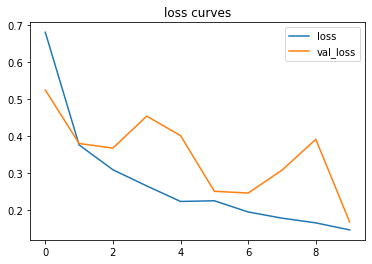

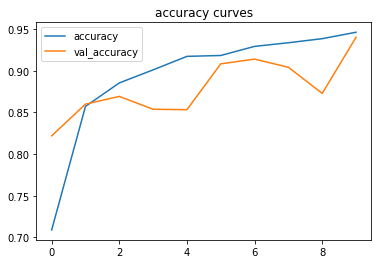

In [ ]:
plot_learning_curves(history_1)

`Understanding from model_1`

Model is working pretty good. Decent accuracy and validation accuracy

## Tune model_1

In [ ]:
model_2 = Sequential([
    Conv2D(20, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(20, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(20, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation="softmax"),
])

model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/10
243/243 [==============================] - 87s 354ms/step - loss: 0.6091 - accuracy: 0.7540 - val_loss: 0.6730 - val_accuracy: 0.7972
Epoch 2/10
243/243 [==============================] - 86s 353ms/step - loss: 0.2794 - accuracy: 0.8972 - val_loss: 0.5828 - val_accuracy: 0.8384
Epoch 3/10
243/243 [==============================] - 86s 354ms/step - loss: 0.2101 - accuracy: 0.9197 - val_loss: 0.4408 - val_accuracy: 0.8523
Epoch 4/10
243/243 [==============================] - 85s 351ms/step - loss: 0.1594 - accuracy: 0.9421 - val_loss: 0.8149 - val_accuracy: 0.7550
Epoch 5/10
243/243 [==============================] - 87s 357ms/step - loss: 0.1630 - accuracy: 0.9427 - val_loss: 0.2044 - val_accuracy: 0.9357
Epoch 6/10
243/243 [==============================] - 86s 352ms/step - loss: 0.1128 - accuracy: 0.9596 - val_loss: 0.1598 - val_accuracy: 0.9470
Epoch 7/10
243/243 [==============================] - 86s 352ms/step - loss: 0.1270 - accuracy: 0.9528 - val_loss: 0.1185 - val_ac

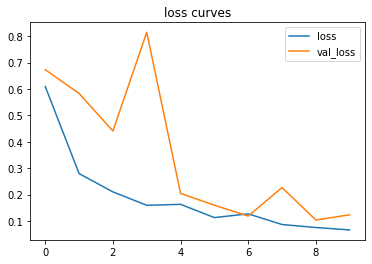

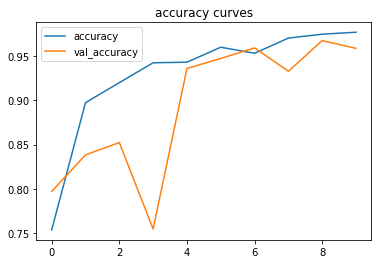

In [ ]:
plot_learning_curves(history_2)

## Adding batch normalization

In [ ]:
from tensorflow.keras.layers import ReLU, BatchNormalization

model_3 = Sequential([
    Conv2D(20, 3, input_shape = (224, 224, 3)),
    ReLU(),
    Conv2D(20, 3),
    ReLU(),
    Conv2D(20, 3),
    ReLU(),
    Flatten(),
    Dense(4, activation="softmax")
])

model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/10
243/243 [==============================] - 94s 379ms/step - loss: 0.9066 - accuracy: 0.7081 - val_loss: 0.6237 - val_accuracy: 0.7941
Epoch 2/10
243/243 [==============================] - 91s 375ms/step - loss: 0.4425 - accuracy: 0.8357 - val_loss: 0.7654 - val_accuracy: 0.7792
Epoch 3/10
243/243 [==============================] - 91s 376ms/step - loss: 0.3604 - accuracy: 0.8735 - val_loss: 0.3515 - val_accuracy: 0.8821
Epoch 4/10
243/243 [==============================] - 91s 376ms/step - loss: 0.2965 - accuracy: 0.8962 - val_loss: 0.3675 - val_accuracy: 0.8523
Epoch 5/10
243/243 [==============================] - 91s 375ms/step - loss: 0.2575 - accuracy: 0.9070 - val_loss: 0.2532 - val_accuracy: 0.9182
Epoch 6/10
243/243 [==============================] - 91s 375ms/step - loss: 0.3118 - accuracy: 0.8866 - val_loss: 0.6334 - val_accuracy: 0.8379
Epoch 7/10
243/243 [==============================] - 91s 375ms/step - loss: 0.2253 - accuracy: 0.9202 - val_loss: 0.3014 - val_ac

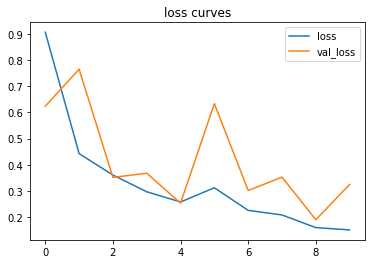

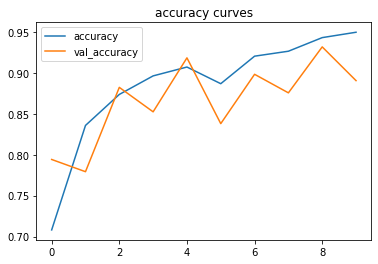

In [ ]:
plot_learning_curves(history_3)

**Note:** Make some changes in prevoius model


In [ ]:
from tensorflow.keras.layers import Activation

model_4 = Sequential([
      Conv2D(20, 3, input_shape = (224,224,3)),
      Conv2D(20, 3),
      BatchNormalization(),
      MaxPool2D(),
      Activation("relu"),
      Conv2D(20, 3),
      Conv2D(20, 3),
      BatchNormalization(),
      MaxPool2D(),
      Activation("relu"),
      Conv2D(20, 3),
      Conv2D(20, 3),
      BatchNormalization(),
      Activation("relu"),
      Flatten(),
      Dense(4, activation="softmax"),
])

model_4.compile(
    loss="categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"],
)

history_4 = model_4.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/10
243/243 [==============================] - 93s 376ms/step - loss: 1.2749 - accuracy: 0.8093 - val_loss: 3.7007 - val_accuracy: 0.5574
Epoch 2/10
243/243 [==============================] - 91s 374ms/step - loss: 0.7714 - accuracy: 0.8900 - val_loss: 1.3583 - val_accuracy: 0.8574
Epoch 3/10
243/243 [==============================] - 91s 375ms/step - loss: 0.4861 - accuracy: 0.9261 - val_loss: 5.1382 - val_accuracy: 0.7174
Epoch 4/10
243/243 [==============================] - 90s 372ms/step - loss: 0.5026 - accuracy: 0.9300 - val_loss: 1.0513 - val_accuracy: 0.8610
Epoch 5/10
243/243 [==============================] - 90s 372ms/step - loss: 0.3383 - accuracy: 0.9485 - val_loss: 0.6127 - val_accuracy: 0.9171
Epoch 6/10
243/243 [==============================] - 91s 373ms/step - loss: 0.2388 - accuracy: 0.9601 - val_loss: 3.4303 - val_accuracy: 0.7926
Epoch 7/10
243/243 [==============================] - 90s 372ms/step - loss: 0.2467 - accuracy: 0.9582 - val_loss: 0.5002 - val_ac

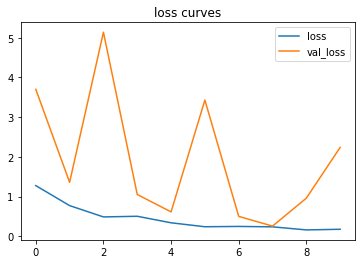

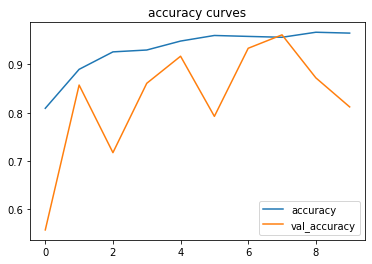

In [ ]:
plot_learning_curves(history_4)

> Preprocessing function for custom images inorder to make predictions on our model

In [ ]:
# Collect the class names from datagenerator

class_names = list(train_data.class_indices)

In [ ]:
# Helper function
def preprocess_custom_image(path, img_shape):
  image = tf.io.read_file(path)
  image = tf.image.decode_image(image)
  image = tf.image.resize(image, size = img_shape),
  image = image[0]/255.
  return image

In [ ]:
# Plot the predictions
def pred_and_plot(path, model, img_shape = (224, 224), class_names = class_names):
  image = preprocess_custom_image(path, img_shape)
  pred = class_names[tf.argmax(model.predict(tf.expand_dims(image, axis = 0))[0]).numpy()]

  accuracy = round(max(model.predict(tf.expand_dims(image, axis = 0))[0])*100,2)
  
  plt.imshow(image)
  plt.axis(False)
  plt.title(f"{pred}: {accuracy}");

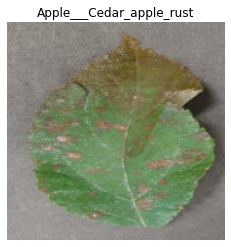

In [ ]:
pred_and_plot("/content/test/test/AppleCedarRust4.JPG", (224, 224), class_names, model_3)

> **Note:**
Download a image from Google and try with that!

--2021-07-07 15:34:42--  http://entoweb.okstate.edu/ddd/IMAGES/car-apple9.jpg
Resolving entoweb.okstate.edu (entoweb.okstate.edu)... 139.78.97.162
Connecting to entoweb.okstate.edu (entoweb.okstate.edu)|139.78.97.162|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 478765 (468K) [image/jpeg]
Saving to: ‘car-apple9.jpg’

car-apple9.jpg      100%[===================>] 467.54K  1.54MB/s    in 0.3s    

2021-07-07 15:34:43 (1.54 MB/s) - ‘car-apple9.jpg’ saved [478765/478765]



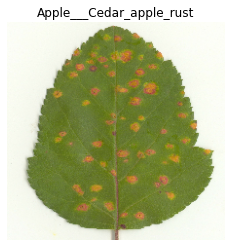

In [ ]:
# Download image
!wget http://entoweb.okstate.edu/ddd/IMAGES/car-apple9.jpg

# Predict image
pred_and_plot("car-apple9.jpg", (224, 224), class_names, model_3)

--2021-07-07 15:34:48--  https://www.kb.jniplants.com/wp-content/uploads/2018/10/cedar-apple-rust-gymnosporangium-juniperi-virginianae-ftimg.jpg
Resolving www.kb.jniplants.com (www.kb.jniplants.com)... 35.209.174.108
Connecting to www.kb.jniplants.com (www.kb.jniplants.com)|35.209.174.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118364 (116K) [image/jpeg]
Saving to: ‘cedar-apple-rust-gymnosporangium-juniperi-virginianae-ftimg.jpg’

cedar-apple-rust-gy 100%[===================>] 115.59K  --.-KB/s    in 0.07s   

2021-07-07 15:34:49 (1.57 MB/s) - ‘cedar-apple-rust-gymnosporangium-juniperi-virginianae-ftimg.jpg’ saved [118364/118364]



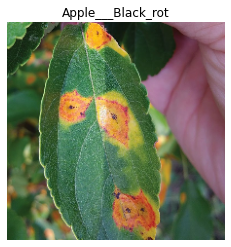

In [ ]:
# More examples
!wget https://www.kb.jniplants.com/wp-content/uploads/2018/10/cedar-apple-rust-gymnosporangium-juniperi-virginianae-ftimg.jpg

# Predictions
pred_and_plot("cedar-apple-rust-gymnosporangium-juniperi-virginianae-ftimg.jpg", (224, 224), class_names, model_3)

--2021-07-07 15:34:55--  https://gardenerspath.com/wp-content/uploads/2019/08/How-to-Identify-and-Control-Apple-Black-Rot-and-Frogeye-Leaf-Spot-Pin.jpg
Resolving gardenerspath.com (gardenerspath.com)... 192.124.249.5
Connecting to gardenerspath.com (gardenerspath.com)|192.124.249.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74879 (73K) [image/jpeg]
Saving to: ‘How-to-Identify-and-Control-Apple-Black-Rot-and-Frogeye-Leaf-Spot-Pin.jpg’

How-to-Identify-and 100%[===================>]  73.12K  --.-KB/s    in 0.1s    

2021-07-07 15:34:55 (633 KB/s) - ‘How-to-Identify-and-Control-Apple-Black-Rot-and-Frogeye-Leaf-Spot-Pin.jpg’ saved [74879/74879]



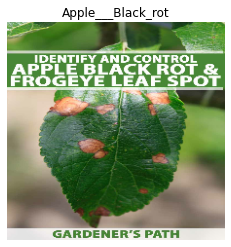

In [ ]:
!wget https://gardenerspath.com/wp-content/uploads/2019/08/How-to-Identify-and-Control-Apple-Black-Rot-and-Frogeye-Leaf-Spot-Pin.jpg

pred_and_plot("How-to-Identify-and-Control-Apple-Black-Rot-and-Frogeye-Leaf-Spot-Pin.jpg")

--2021-07-07 15:35:00--  https://netreefruit.org/sites/netreefruit.org/files/images/rot_black_frogeye.jpg
Resolving netreefruit.org (netreefruit.org)... 128.119.50.91
Connecting to netreefruit.org (netreefruit.org)|128.119.50.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49023 (48K) [image/jpeg]
Saving to: ‘rot_black_frogeye.jpg’

rot_black_frogeye.j 100%[===================>]  47.87K  --.-KB/s    in 0.08s   

2021-07-07 15:35:01 (622 KB/s) - ‘rot_black_frogeye.jpg’ saved [49023/49023]



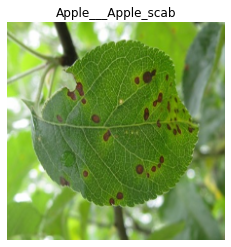

In [ ]:
!wget https://netreefruit.org/sites/netreefruit.org/files/images/rot_black_frogeye.jpg

pred_and_plot("rot_black_frogeye.jpg")

--2021-07-07 15:35:08--  https://blogs.cornell.edu/applevarietydatabase/files/2018/11/DSC_4071-1z1gs6i.jpg
Resolving blogs.cornell.edu (blogs.cornell.edu)... 35.172.73.102, 34.227.238.166
Connecting to blogs.cornell.edu (blogs.cornell.edu)|35.172.73.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cpb-us-e1.wpmucdn.com/blogs.cornell.edu/dist/4/8542/files/2018/11/DSC_4071-1z1gs6i.jpg [following]
--2021-07-07 15:35:08--  https://cpb-us-e1.wpmucdn.com/blogs.cornell.edu/dist/4/8542/files/2018/11/DSC_4071-1z1gs6i.jpg
Resolving cpb-us-e1.wpmucdn.com (cpb-us-e1.wpmucdn.com)... 151.139.243.2
Connecting to cpb-us-e1.wpmucdn.com (cpb-us-e1.wpmucdn.com)|151.139.243.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311514 (304K) [image/jpeg]
Saving to: ‘DSC_4071-1z1gs6i.jpg’

DSC_4071-1z1gs6i.jp 100%[===================>] 304.21K  --.-KB/s    in 0.05s   

2021-07-07 15:35:08 (5.84 MB/s) - ‘DSC_4071-1z1gs6i.jpg’ saved [311514/31151

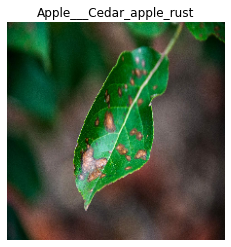

In [ ]:
!wget https://blogs.cornell.edu/applevarietydatabase/files/2018/11/DSC_4071-1z1gs6i.jpg

pred_and_plot("DSC_4071-1z1gs6i.jpg")

Build a new model without batch norm

In [ ]:
model_5 = Sequential([
      Conv2D(20, 3, input_shape = (224, 224, 3), activation = "relu"),
      Conv2D(20, 3, activation = "relu"),
      MaxPool2D(),
      Conv2D(20, 3, activation = "relu"),
      Conv2D(20, 3, activation = "relu"),
      MaxPool2D(),
      Conv2D(20, 3, activation = "relu"),
      Conv2D(20, 3, activation = "relu"),
      MaxPool2D(),
      Flatten(),
      Dense(4, activation = "softmax")
])

model_5.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"],
)

history_5 = model_5.fit(
    train_data,
    epochs = 15,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/15
243/243 [==============================] - 90s 369ms/step - loss: 0.6992 - accuracy: 0.6948 - val_loss: 0.5027 - val_accuracy: 0.8029
Epoch 2/15
243/243 [==============================] - 90s 369ms/step - loss: 0.3841 - accuracy: 0.8532 - val_loss: 0.4324 - val_accuracy: 0.8487
Epoch 3/15
243/243 [==============================] - 90s 368ms/step - loss: 0.2836 - accuracy: 0.8938 - val_loss: 0.3679 - val_accuracy: 0.8657
Epoch 4/15
243/243 [==============================] - 90s 370ms/step - loss: 0.2062 - accuracy: 0.9230 - val_loss: 0.2785 - val_accuracy: 0.9002
Epoch 5/15
243/243 [==============================] - 91s 376ms/step - loss: 0.1637 - accuracy: 0.9386 - val_loss: 0.3042 - val_accuracy: 0.8873
Epoch 6/15
243/243 [==============================] - 90s 372ms/step - loss: 0.1392 - accuracy: 0.9472 - val_loss: 0.1880 - val_accuracy: 0.9315
Epoch 7/15
243/243 [==============================] - 91s 373ms/step - loss: 0.1323 - accuracy: 0.9519 - val_loss: 0.3376 - val_ac

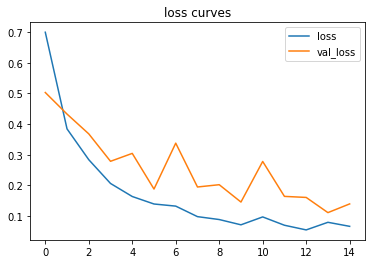

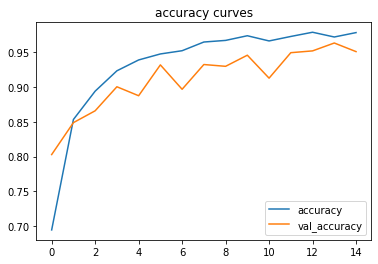

In [ ]:
plot_learning_curves(history_5)

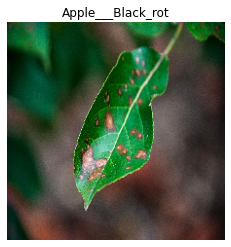

In [ ]:
pred_and_plot("DSC_4071-1z1gs6i.jpg", model = model_5)

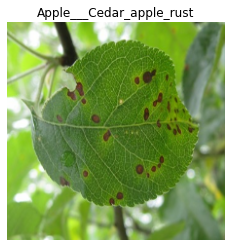

In [ ]:
pred_and_plot("rot_black_frogeye.jpg", model = model_5)

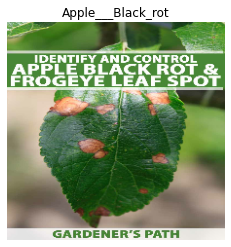

In [ ]:
pred_and_plot("How-to-Identify-and-Control-Apple-Black-Rot-and-Frogeye-Leaf-Spot-Pin.jpg", model = model_5)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

model_6 = Sequential([
      Conv2D(50, 3, input_shape = (224, 224, 3), activation = "relu"),
      Conv2D(50, 3, activation = "relu"),
      MaxPool2D(),
      Conv2D(50, 3, activation = "relu"),
      Conv2D(50, 3, activation = "relu"),
      MaxPool2D(),
      Conv2D(50, 3, activation = "relu"),
      Conv2D(50, 3, activation = "relu"),
      MaxPool2D(),
      Flatten(),
      Dense(4, activation = "softmax")
])

model_6.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"],
)

history_6 = model_6.fit(
    train_data,
    epochs = 15,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/15
243/243 [==============================] - 136s 417ms/step - loss: 0.6870 - accuracy: 0.7163 - val_loss: 0.9500 - val_accuracy: 0.7097
Epoch 2/15
243/243 [==============================] - 96s 396ms/step - loss: 0.3592 - accuracy: 0.8645 - val_loss: 0.3190 - val_accuracy: 0.8801
Epoch 3/15
243/243 [==============================] - 96s 393ms/step - loss: 0.2650 - accuracy: 0.9050 - val_loss: 0.2835 - val_accuracy: 0.9007
Epoch 4/15
243/243 [==============================] - 95s 391ms/step - loss: 0.1737 - accuracy: 0.9376 - val_loss: 0.1441 - val_accuracy: 0.9485
Epoch 5/15
243/243 [==============================] - 99s 407ms/step - loss: 0.1437 - accuracy: 0.9474 - val_loss: 0.1224 - val_accuracy: 0.9563
Epoch 6/15
243/243 [==============================] - 101s 414ms/step - loss: 0.1130 - accuracy: 0.9600 - val_loss: 0.2413 - val_accuracy: 0.9249
Epoch 7/15
243/243 [==============================] - 100s 411ms/step - loss: 0.1434 - accuracy: 0.9533 - val_loss: 0.2441 - val

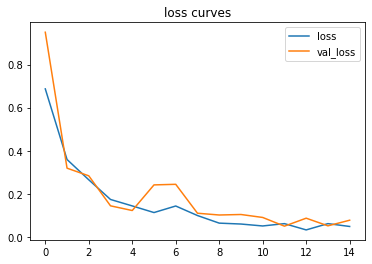

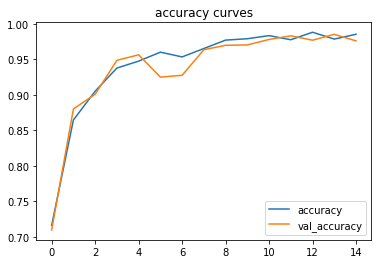

In [ ]:
plot_learning_curves(history_6)

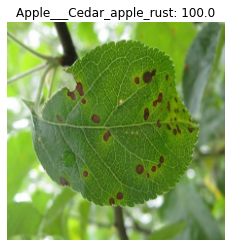

In [ ]:
pred_and_plot("rot_black_frogeye.jpg", model = model_6)

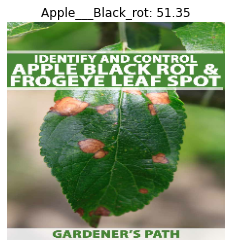

In [ ]:
pred_and_plot("How-to-Identify-and-Control-Apple-Black-Rot-and-Frogeye-Leaf-Spot-Pin.jpg", model = model_6)

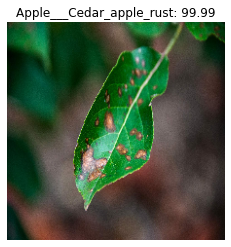

In [ ]:
pred_and_plot("DSC_4071-1z1gs6i.jpg", model = model_6)

Yahooo!! We have achieved a great aacuracy.<br>Let us save this model.

## Saving model

In [ ]:
model_6.save("apple_model.h5")

## TF Lite conveter
> Before converting the model using tflite converter, save the labels used in model in a text file.

After that conver it into tf lite model

In [ ]:
def prepare_labels_tflite(data, filename = "labels.txt", verbose = True):
  labels = "\n".join(sorted(data.class_indices.keys()))

  if verbose:
    print(f"Labels:\n{labels}\n")

  with open(filename, "w") as f:
    print("saving labels ....")
    f.write(labels)
    print(f"{filename} is saved at {os.getcwd()}")

In [ ]:
prepare_labels_tflite(train_data)

Labels:
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy

saving labels ....
labels.txt is saved at /content


**Note:**  Now comes the converter part

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_6)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmprzd6p4ar/assets


In [ ]:
with open("apple_model.tflite", "wb") as f:
  f.write(tflite_model)

> **Note:** Saving tflite model is done

--2021-07-09 07:06:41--  https://media.wired.com/photos/5a595516f11e325008172bcb/master/w_2560%2Cc_limit/BabyGlimpseBaby-640504936.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216408 (211K) [image/jpeg]
Saving to: ‘BabyGlimpseBaby-640504936.jpg’

BabyGlimpseBaby-640 100%[===================>] 211.34K  --.-KB/s    in 0.004s  

2021-07-09 07:06:41 (47.3 MB/s) - ‘BabyGlimpseBaby-640504936.jpg’ saved [216408/216408]



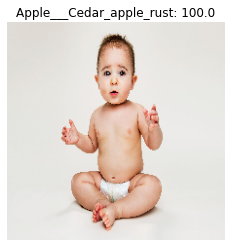

In [ ]:
!wget https://media.wired.com/photos/5a595516f11e325008172bcb/master/w_2560%2Cc_limit/BabyGlimpseBaby-640504936.jpg

pred_and_plot("BabyGlimpseBaby-640504936.jpg", model=model_6)

--2021-07-09 07:09:38--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Set_of_fourteen_side_chairs_MET_DP110780.jpg/220px-Set_of_fourteen_side_chairs_MET_DP110780.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11808 (12K) [image/jpeg]
Saving to: ‘220px-Set_of_fourteen_side_chairs_MET_DP110780.jpg’

220px-Set_of_fourte 100%[===================>]  11.53K  --.-KB/s    in 0s      

2021-07-09 07:09:38 (162 MB/s) - ‘220px-Set_of_fourteen_side_chairs_MET_DP110780.jpg’ saved [11808/11808]



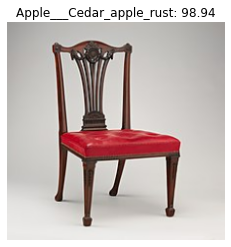

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Set_of_fourteen_side_chairs_MET_DP110780.jpg/220px-Set_of_fourteen_side_chairs_MET_DP110780.jpg

pred_and_plot("220px-Set_of_fourteen_side_chairs_MET_DP110780.jpg", model_6)

## Sample images